In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
MW_data = pd.read_excel('MW Data.xlsx')
R_kpc = MW_data['Radius (kpc)'].to_numpy()
R_m = MW_data['Radius (m)'].to_numpy()
V_km_s = MW_data['Velocity (km/s)'].to_numpy()
V_m_s = MW_data['Velocity (m/s)'].to_numpy()

In [3]:
MW_data2 = pd.read_csv('tabmw.dat.txt',sep=' ',names=['Rkpc','Vkms','StDev','StError'])
R_kpc2 = MW_data2['Rkpc'].to_numpy()
R_m2 = R_kpc2*10**19
V_km_s2 = MW_data2['Vkms'].to_numpy()
V_m_s2 = V_km_s2*1000

In [4]:
MW_data3 = pd.read_csv('tabmw2.dat.txt',sep=' ',names=['Rkpc','Vkms'])
R_kpc3 = MW_data3['Rkpc'].to_numpy()
R_m3 = R_kpc2*10**19
V_km_s3 = MW_data3['Vkms'].to_numpy()
V_m_s3 = V_km_s2*1000

In [5]:
R_m_tot = np.append(R_m2,R_m3)
V_m_s_tot = np.append(V_m_s2,V_m_s3)

In [60]:
def MN(R,M,a,b):
    v_vals = []
    G = 6.67*10**(-11)
    for i in np.linspace(0,R,num=1000):
        v = ((G*M*i**2)/((i**2+(a+b)**2)**(3/2)))**(1/2)
        v_vals.append(v)
    return v_vals

def MN_EUP(R,M,a,b):
    v_vals = []
    G = 6.67*10**(-11)
    c = 3*10**8
    L_star = 10**13
    EUP = (1+((4*G**2*M**2)/(c**4*L_star**2)))
    for i in np.linspace(0,R,num=100):
        v = (((G*M*i**2)/((i**2+(a+b)**2)**(3/2)))*EUP)**(1/2)
        v_vals.append(v)
    return v_vals

Text(0.5, 1.0, 'Matching EUP Mass to Non-EUP Mass (L=10e13)')

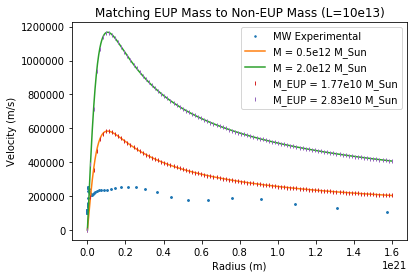

In [68]:
R = 1.6*10**21
a = 7*10**19
b = 0.5*10**19
M_Sun = 1.989*10**30

v_MN1 = MN(R,0.5*10**12*M_Sun,a,b)
v_MN2 = MN(R,2*10**12*M_Sun,a,b)

v_MN_EUP1 = MN_EUP(R,1.77*10**10*M_Sun,a,b)
v_MN_EUP2 = MN_EUP(R,2.83*10**10*M_Sun,a,b)

#plt.plot(R_m2,V_m_s2,label='MW Experimental')
#plt.plot(R_m3,V_m_s3,label='M31 Experimental')
plt.plot(R_m_tot,V_m_s_tot,'.',markersize=3,label='MW Experimental')

plt.plot(np.linspace(0,R,num=1000),v_MN1,label='M = 0.5e12 M_Sun')
plt.plot(np.linspace(0,R,num=1000),v_MN2,label='M = 2.0e12 M_Sun')

plt.plot(np.linspace(0,R,num=100),v_MN_EUP1,'|',markersize=4,label='M_EUP = 1.77e10 M_Sun')
plt.plot(np.linspace(0,R,num=100),v_MN_EUP2,'|',markersize=4,label='M_EUP = 2.83e10 M_Sun')

plt.xlabel('Radius (m)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.title('Matching EUP Mass to Non-EUP Mass (L=10e13)')